In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import lmfit

In [8]:
data0 = np.loadtxt('../data/zeeman_used/ZeemanX_ohneB.txt', delimiter=';', skiprows=5)
data_mess = np.loadtxt('../data/zeeman_used/ZeemanX_mitB.txt', delimiter=';', skiprows=5)
data1 = np.loadtxt('../data/zeeman_used/ZeemanX_4020mA.txt', delimiter=';', skiprows=5)
data2 = np.loadtxt('../data/zeeman_used/ZeemanX_4580mA.txt', delimiter=';', skiprows=5)
data3 = np.loadtxt('../data/zeeman_used/ZeemanX_5420mA.txt', delimiter=';', skiprows=5)
data4 = np.loadtxt('../data/zeeman_used/ZeemanX_5700mA.txt', delimiter=';', skiprows=5)
data5 = np.loadtxt('../data/zeeman_used/ZeemanX_6000mA.txt', delimiter=';', skiprows=5)
data6 = np.loadtxt('../data/zeeman_used/ZeemanX_6550mA.txt', delimiter=';', skiprows=5)
data7 = np.loadtxt('../data/zeeman_used/ZeemanX_7080mA.txt', delimiter=';', skiprows=5)
data8 = np.loadtxt('../data/zeeman_used/ZeemanX_7620mA.txt', delimiter=';', skiprows=5)
data9 = np.loadtxt('../data/zeeman_used/ZeemanX_8010mA.txt', delimiter=';', skiprows=5)
data10 = np.loadtxt('../data/zeeman_used/ZeemanX_8720mA.txt', delimiter=';', skiprows=5)

alldata = np.array([data0, data_mess, data1, data2, data3, data4, data5, data6, data7, data8, data9, data10])
dataB = np.array([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10])

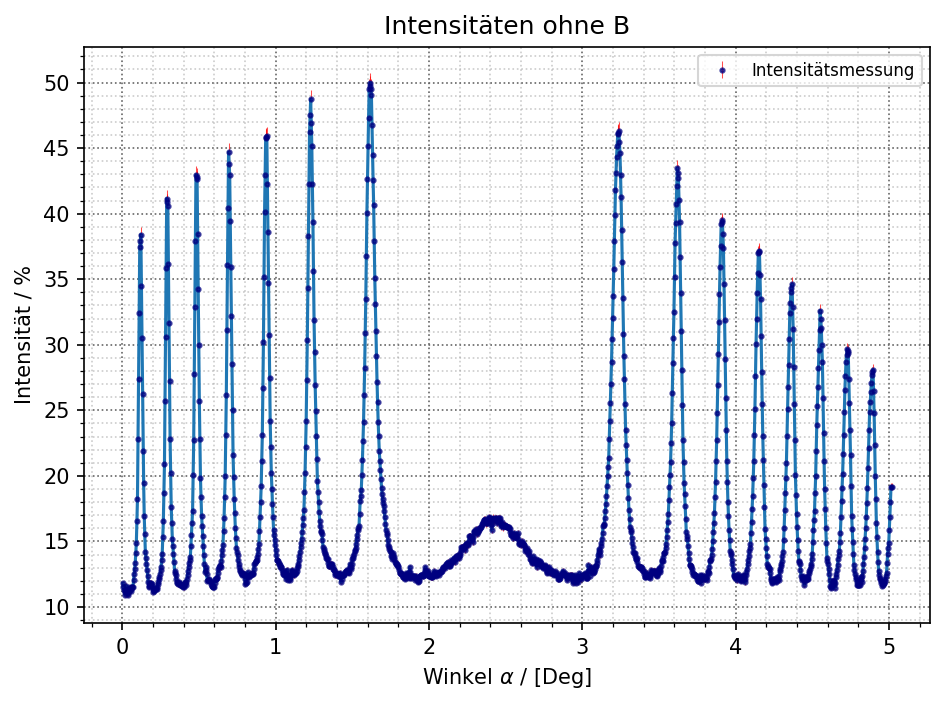

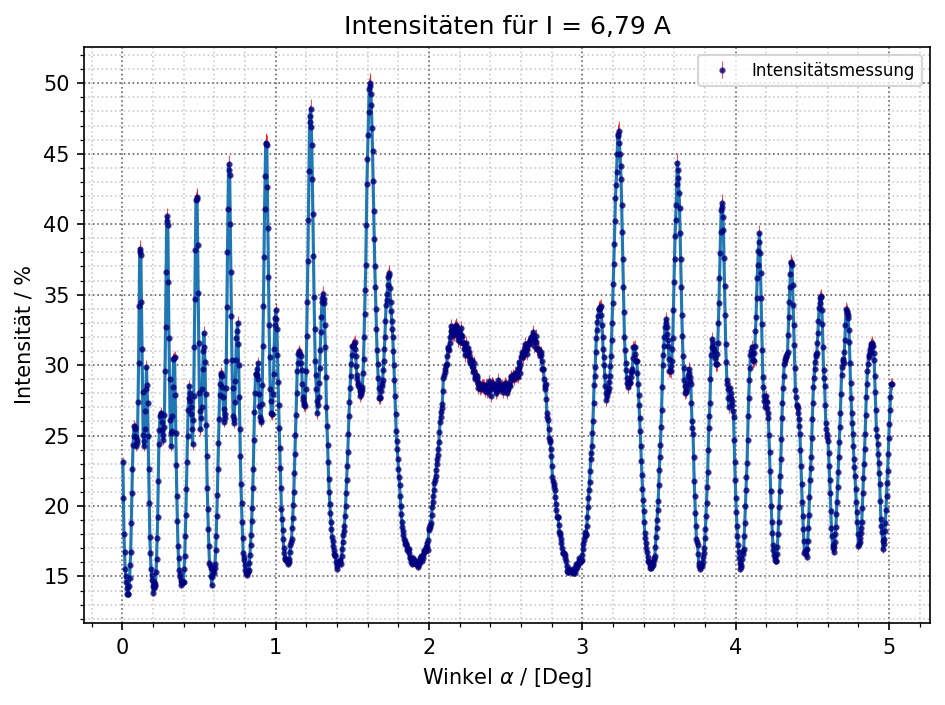

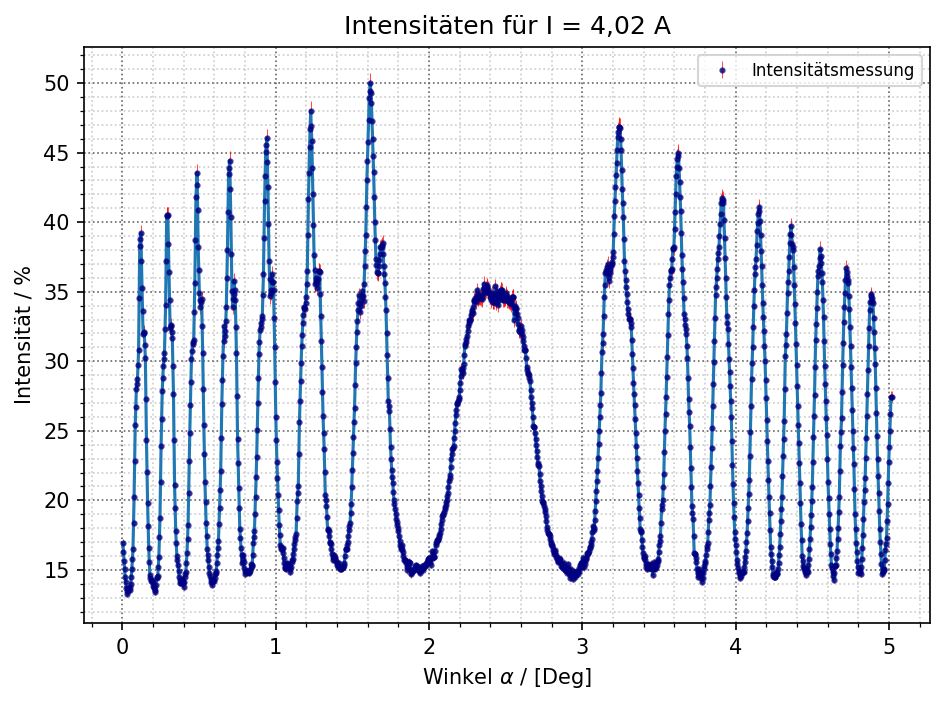

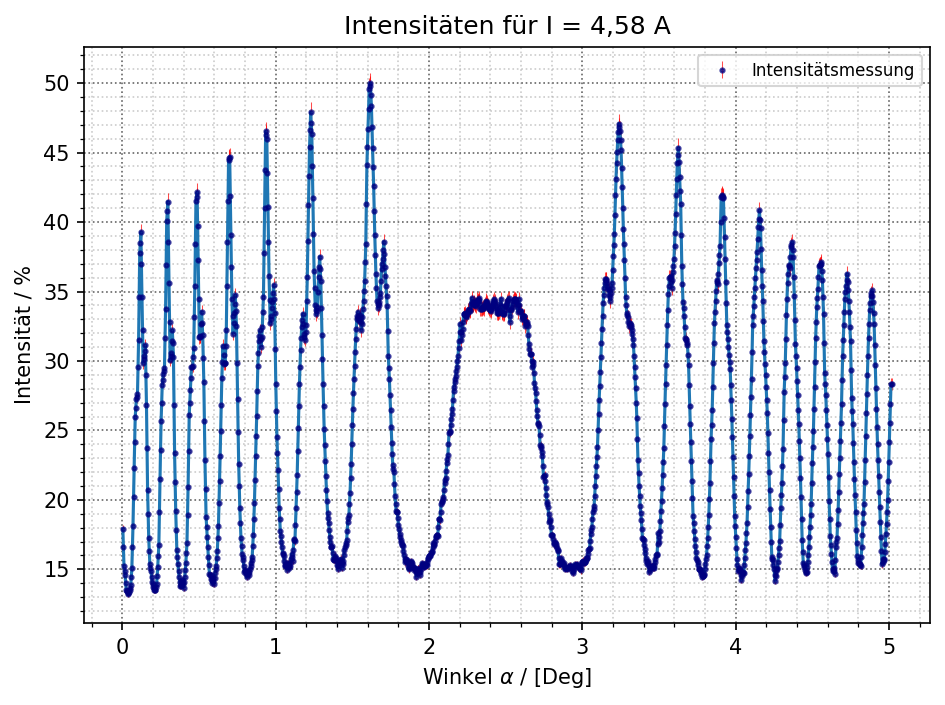

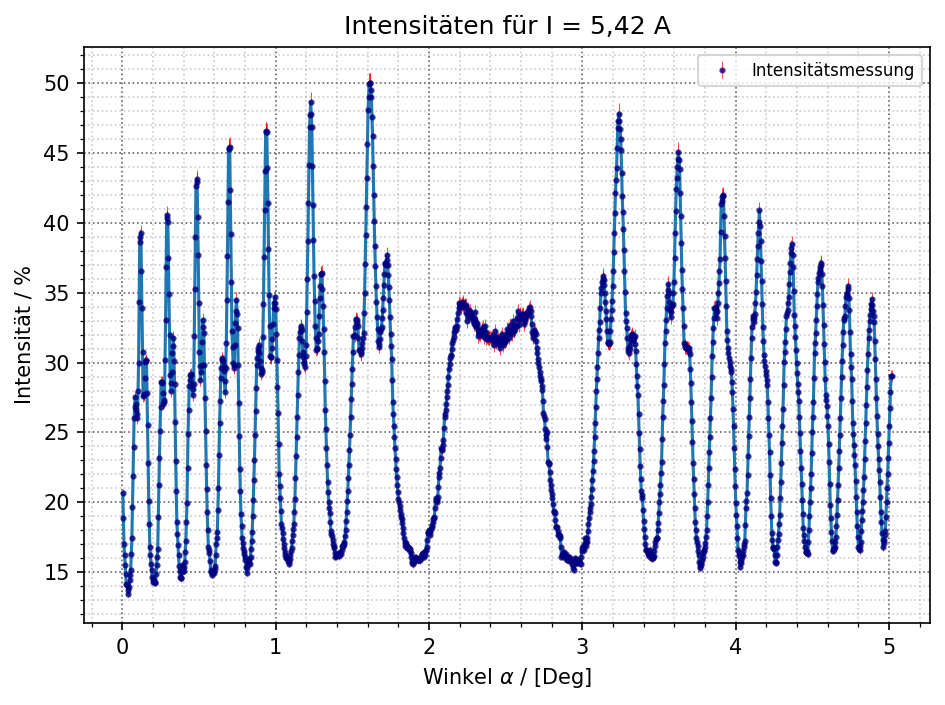

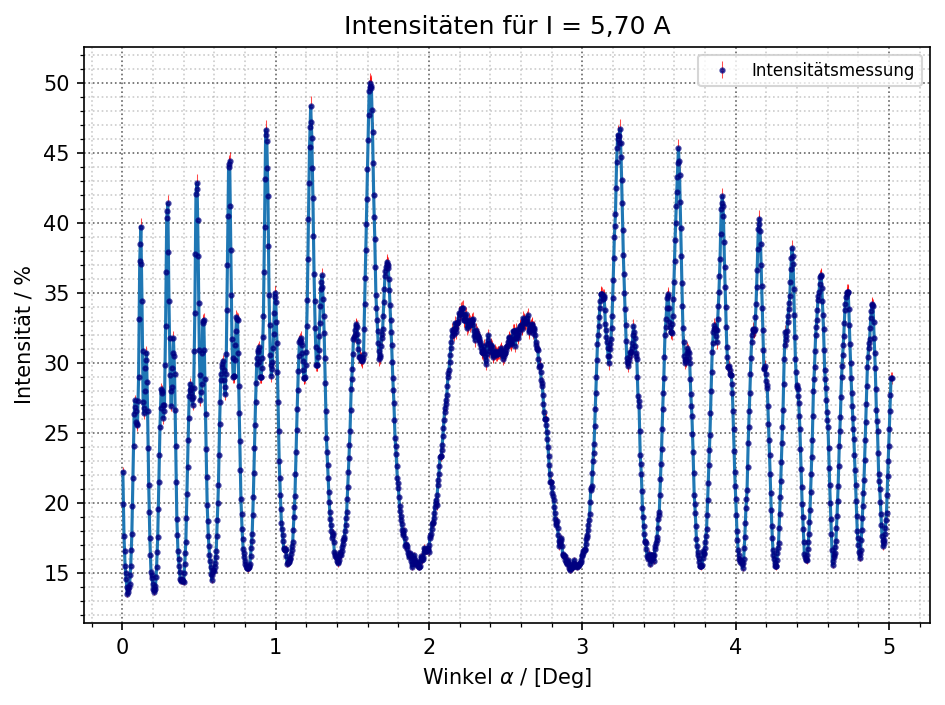

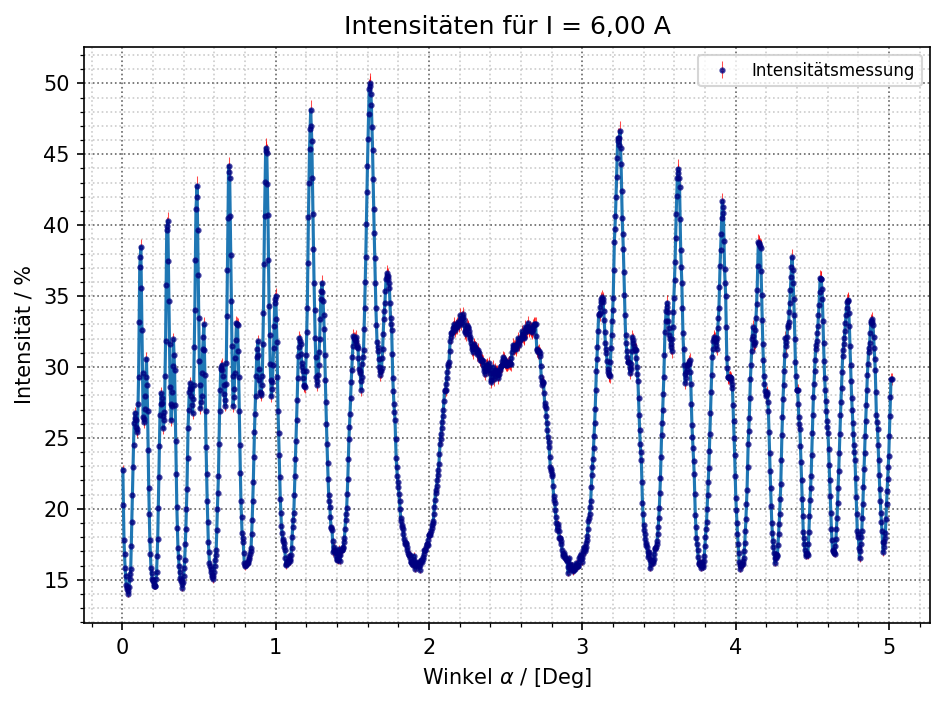

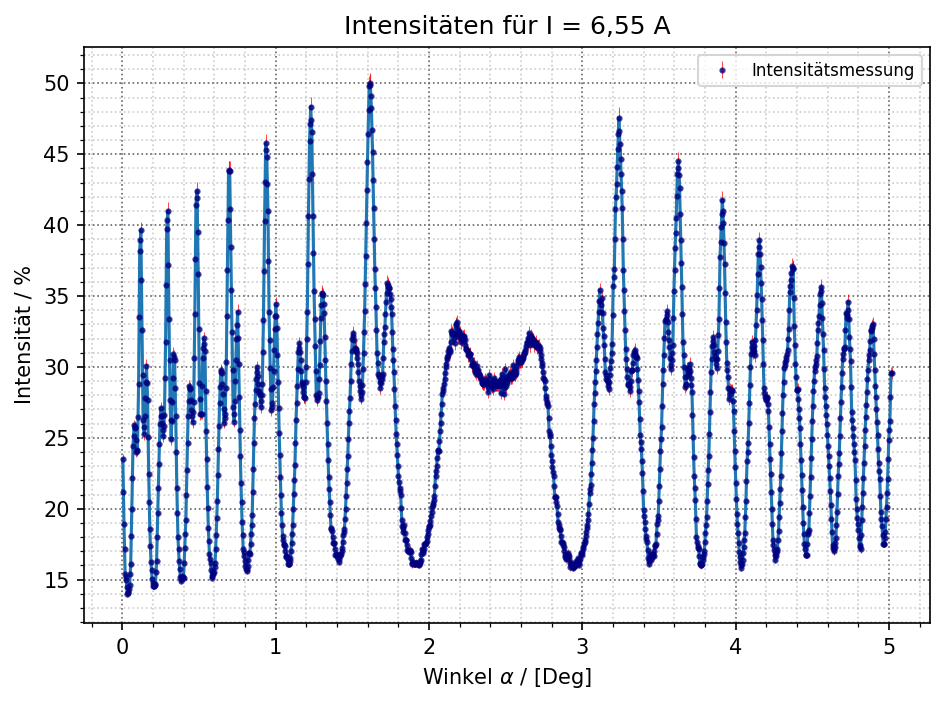

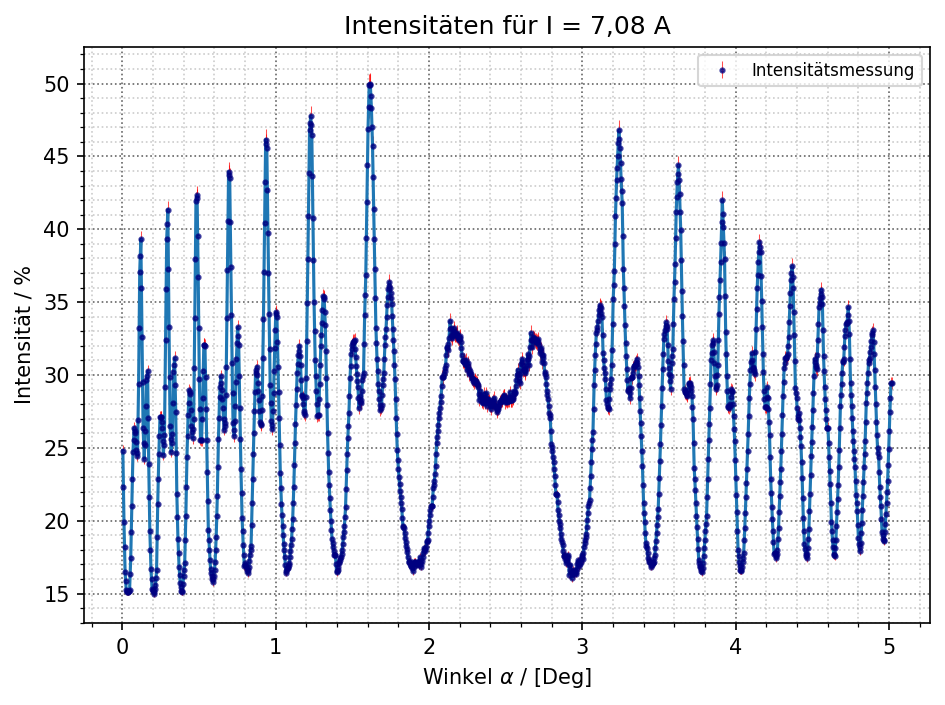

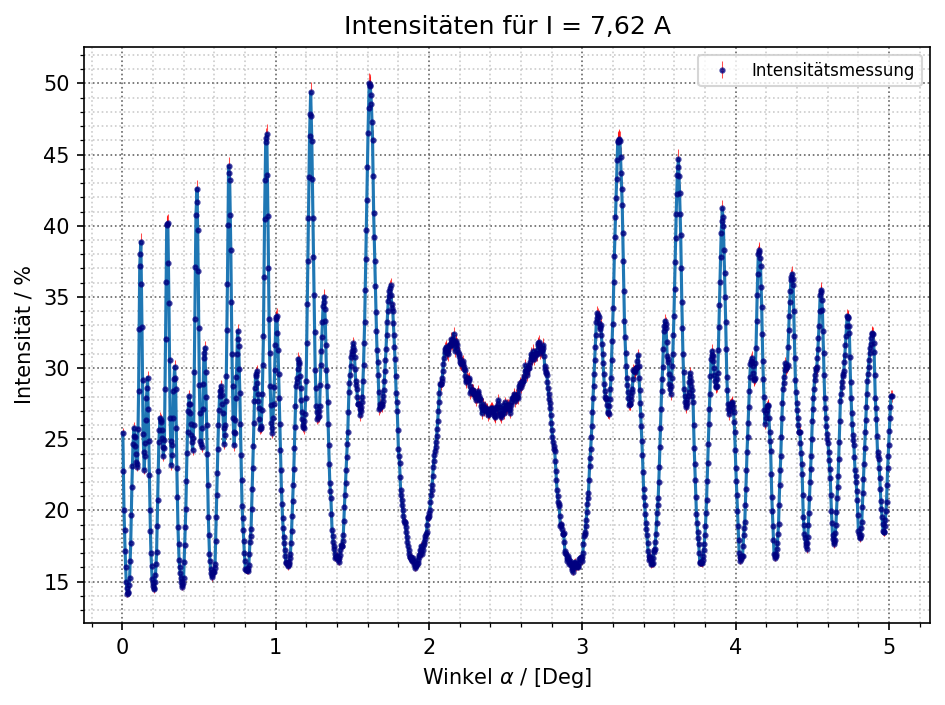

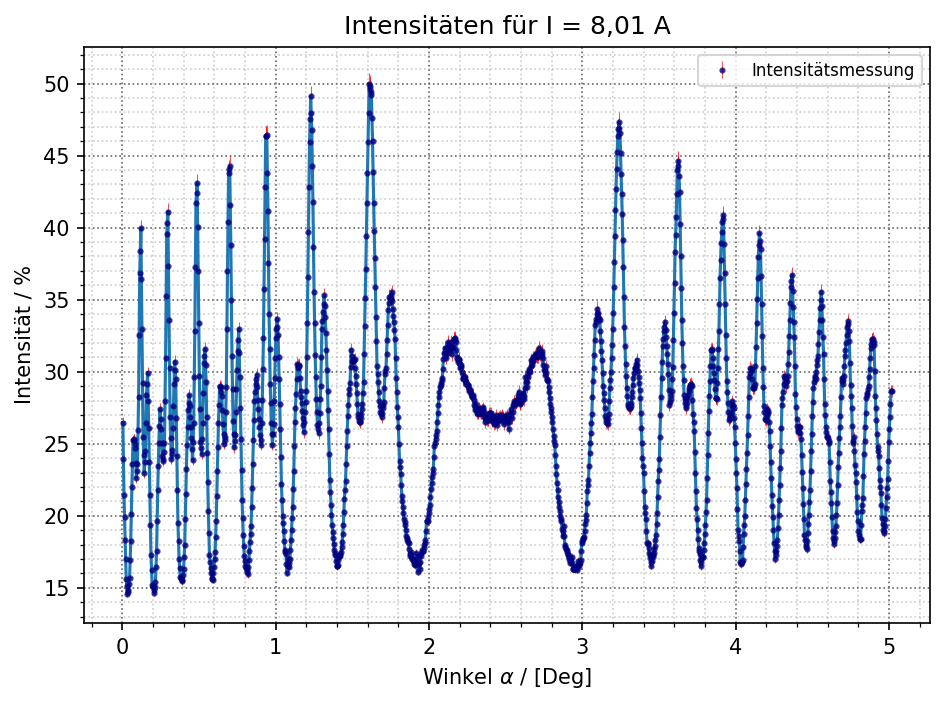

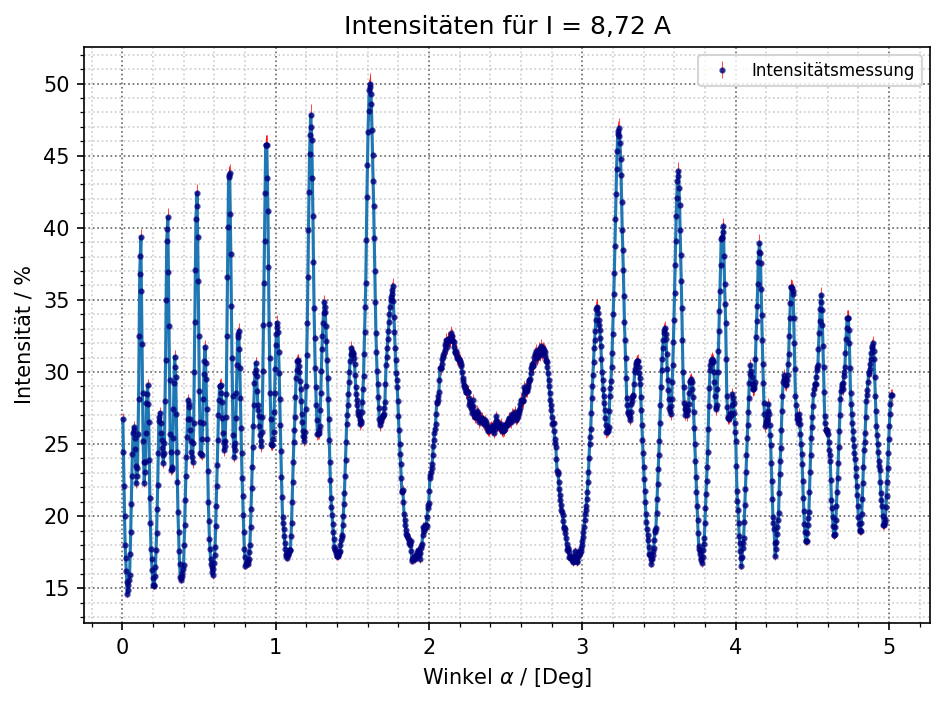

In [ ]:
alldata_namen = [
    'ohne B',
    'für I = 6,79 A',
    'für I = 4,02 A',
    'für I = 4,58 A',
    'für I = 5,42 A',
    'für I = 5,70 A',
    'für I = 6,00 A',
    'für I = 6,55 A',
    'für I = 7,08 A',
    'für I = 7,62 A',
    'für I = 8,01 A',
    'für I = 8,72 A'
]
alldata_benennung = [
    'ohneB',
    'mitB',
    '4020mA',
    '4580mA',
    '5420mA',
    '5700mA',
    '6000mA',
    '6550mA',
    '7080mA',
    '7620mA',
    '8010mA',
    '8720mA'
]

dataB_namen = [
    '4,02 A',
    '4,58 A',
    '5,42 A',
    '5,70 A',
    '6,00 A',
    '6,55 A',
    '7,08 A',
    '7,62 A',
    '8,01 A',
    '8,72 A'
]
dataB_benennung = [
    '4020mA',
    '4580mA',
    '5420mA',
    '5700mA',
    '6000mA',
    '6550mA',
    '7080mA',
    '7620mA',
    '8010mA',
    '8720mA'
]

def plot(arr, int, int2, bool):
    #alpha = np.arctan(((1024-np.array(arr[:,0]))*0.014) / (150))
    alpha = (np.array(arr[:,0])*9.6e-6) / (0.15) * 180/np.pi
    #print(alpha)
    Imax = np.max(arr[:,1])
    I = np.array(arr[:,1])/Imax *50
    dI = I/100*1.5
    fig, ax = plt.subplots(num=2, dpi=150)
    plt.errorbar(alpha, I, yerr=dI, fmt='o', label='Intensitätsmessung',markersize=2, capsize=0, alpha=0.7, color='navy', ecolor='red', elinewidth=0.5)
    
    plt.grid(visible=True, which='major', color='#666666', linestyle=':')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle=':', alpha=0.5)
    plt.legend(prop={'size': 8}, loc = 'best')
    plt.xlabel(r'Winkel $\alpha$ / [Deg]')
    plt.ylabel(r'Intensität / %')
    if bool == True:
        plt.xlim([1.5,1.8])
        plt.title(fr'Intensitäten für I= {int}')
        plt.savefig(f'plots/zeeman_plt/ZeemanX_{int2}.png', dpi=150)
    else:
        plt.plot(alpha, I)
        plt.title(fr'Intensitäten {int}')
        plt.savefig(f'plots/zeeman_plt/ZeemanX_{int2}.png', dpi=150)
#        if int > 0:
#            plt.title(fr'Intensitäten für I= {int} A')
#        else:
#            plt.title(fr'Intensitäten für I= 0 A')
    plt.tight_layout()
    plt.show()
    
for i in range(len(alldata)):
    plot(alldata[i], alldata_namen[i],alldata_benennung[i], False)